# Bandit Problem

In [279]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [280]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [281]:
bandits[0].pullLever()

-0.9271922058947168

## Greedy algorithm Implementation

In [282]:
def run_greedy(bandits, iter):
    rewards=[]
    ban_iter=np.zeros(len(bandits))
    ban_avg=np.zeros(len(bandits))
    for i in range(iter):
        choice = np.argmax(ban_avg)
        reward=bandits[choice].pullLever()
        rewards.append(reward)
        ban_iter[choice]+=1
        ban_avg[choice]=ban_avg[choice]+(reward-ban_avg[choice])/ban_iter[choice]
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

In [293]:
cumre = np.cumsum(run_greedy(bandits, 1000))
cumre /= np.arange(1,len(cumre)+1)

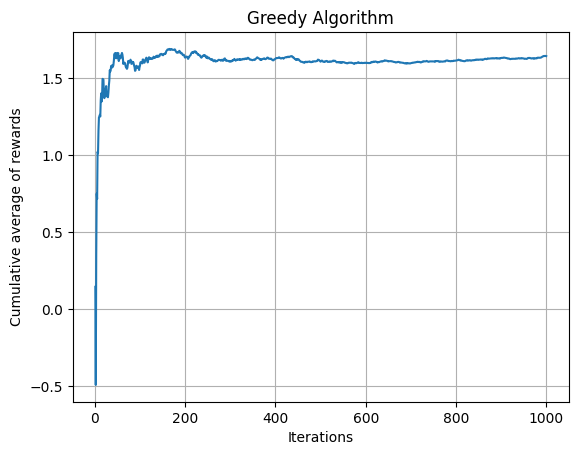

In [294]:

y = cumre
x = np.arange(1,1001)
plt.plot(x,y)
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Cumulative average of rewards")
plt.title("Greedy Algorithm")
plt.show()

## $\epsilon$-greedy Algorithm

In [295]:
def run_epsilon_greedy(epsilon):
# TODO: Implement the epsilon greedy algorithm here
# Return the reward from the bandits in a list

        rewards=[]
        ban_iter=np.zeros(len(bandits))
        ban_avg=np.zeros(len(bandits))
        for i in range(1000):
                if (random.random() <= epsilon) :
                        rg = np.random.default_rng()
                        choice = (rg.integers(1)) % len(bandits)
                else :
                        choice = np.argmax(ban_avg)
                reward=bandits[choice].pullLever()
                rewards.append(reward)
                ban_iter[choice]+=1
                ban_avg[choice]=ban_avg[choice]+(reward-ban_avg[choice])/ban_iter[choice]

        return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

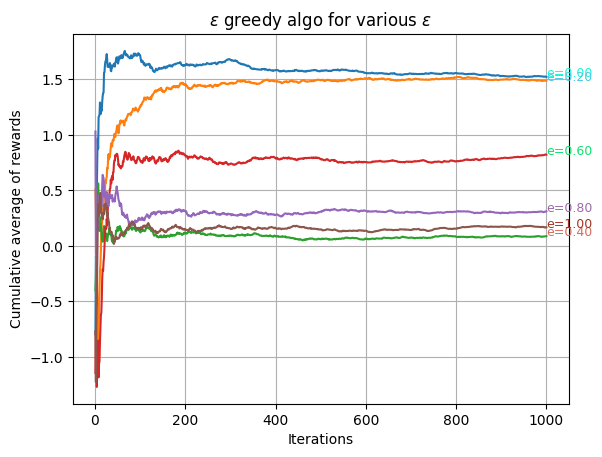

In [296]:
for j in range(6) :
    randomised="#{:06x}".format(random.randint(0, 0xFFFFFF))
    ep = j*0.2
    y = run_epsilon_greedy(epsilon=ep)
    cumre = np.cumsum(y)
    cumre /= np.arange(1,len(cumre)+1)
    plt.plot(np.arange(1,len(cumre)+1),cumre)
    plt.text(len(y)-1,cumre[-1],f"e={ep:.2f}",fontsize=9,color=randomised)
    plt.grid(True)

plt.xlabel("Iterations")
plt.ylabel("Cumulative average of rewards")
plt.title("$\\epsilon$ greedy algo for various $\\epsilon$")
plt.show()



## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

0.002002002002002002


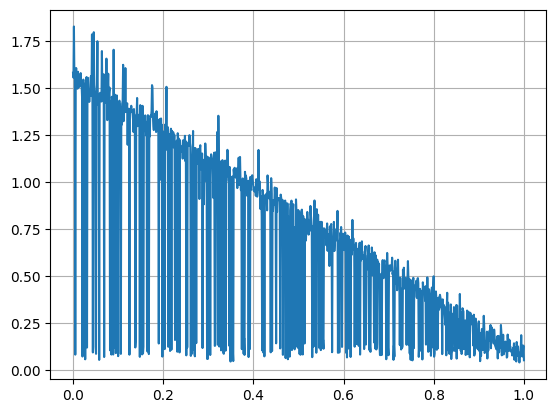

In [306]:
arr=[]
eps=np.linspace(start=0,stop=1,endpoint=True, num = 1000)
for j in eps:
    y = run_epsilon_greedy(j)
    cumre = np.cumsum(y)
    cumre /= np.arange(1,len(cumre)+1)
    arr.append(cumre[-1])
max=np.argmax(arr)
plt.plot(eps,arr)
print(eps[max])
plt.grid(True)

## Optimistic Initial Values

In [288]:
def run_optimistic_greedy(bandits, init):
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    rewards=[]
    ban_iter=np.zeros(len(bandits))
    ban_avg=np.zeros(len(bandits)) + init
    #print(ban_avg)
    for i in range(1000):
        choice = np.argmax(ban_avg)
        reward=bandits[choice].pullLever()
        rewards.append(reward)
        ban_iter[choice]+=1
        ban_avg[choice]=ban_avg[choice]+(reward-ban_avg[choice])/ban_iter[choice]
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

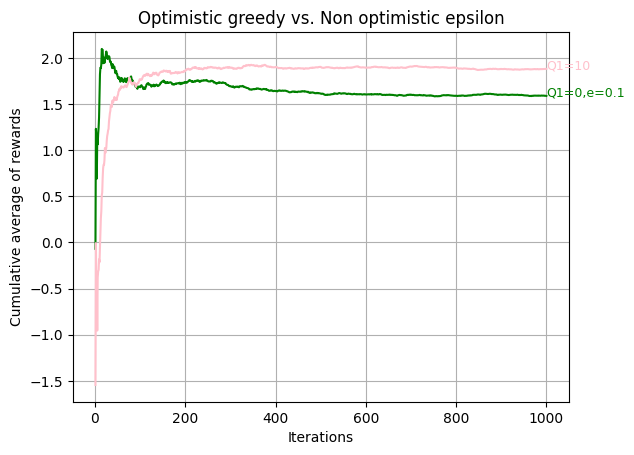

In [289]:
cumre = np.cumsum(run_optimistic_greedy(bandits,10))
cumre /= np.arange(1,len(cumre)+1)
y = cumre
x = np.arange(1,1001)

cumre1 = np.cumsum(run_greedy(bandits, 1000))
cumre1 /= np.arange(1,len(cumre1)+1)
y1 = cumre1
x1 = np.arange(1,1001)
plt.plot(x1,y1,color="green")
plt.grid(True)
plt.text(len(cumre) - 1, cumre[-1], "Q1=10", fontsize=9, color="pink")
plt.text(len(cumre1) - 1, cumre1[-1], "Q1=0,e=0.1", fontsize=9, color="green")
plt.xlabel("Iterations")
plt.ylabel("Cumulative average of rewards")
plt.title("Optimistic greedy vs. Non optimistic epsilon")
plt.plot(x,y,color="pink")
plt.grid(True)

## Optional - Upper Confidence Bound (UCB)

In [290]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass